In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='ttt', src=FILE, fpath='./hce_data/australian/australian.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.011988639831542969] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "A1": "numeric",
    "A2": "numeric",
    "A3": "numeric",
    "A4": "numeric",
    "A5": "numeric",
    "A6": "numeric",
    "A7": "numeric",
    "A8": "numeric",
    "A9": "numeric",
    "A10": "numeric",
    "A11": "numeric",
    "A12": "numeric",
    "A13": "numeric",
    "A14": "numeric",
    "A15": "numeric"
}
INFO:profiler.data.dataset:(possible types: numeric, categorical, text, date)
INFO:profiler.data.dataset:inferred operators of attributes: {'A1': ['equal'], 'A2': ['equal'], 'A3': ['equal'], 'A4': ['equal'], 'A5': ['equal'], 'A6': ['equal'], 'A7': ['equal'], 'A8': ['equal'], 'A9': ['equal'], 'A10': ['equal'], 'A11': ['equal'], 'A

In [4]:
# pf.session.change_dtypes(['tls', 'ZipCode', 'PhoneNumber', 'State', 'EmergencyService','Score', 'Sample'], 
#                             [CATEGORICAL, NUMERIC, CATEGORICAL, TEXT, TEXT, NUMERIC, NUMERIC],
#                             [None, None, None, None, None, r'(\d+)%', r'(\d+)\spatients'])

In [5]:
pf.session.load_training_data(multiplier = None, difference=True)

INFO:profiler.utility:[0.0645146369934082] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 12 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 12, and the bound is 0.00128383
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 15/15 [00:00<00:00, 398.34it/s]
INFO:profiler.data.transformer:Number of training samples: 10350
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[0.25838804244995117] Create Training Data execution time: 0.19387340545654297



In [6]:
# set sparsity to 0 for exp_reproduce 
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[0.26442980766296387] Learn Structure start

INFO:profiler.learner:use threshold 1.0506
INFO:profiler.utility:[0.37856626510620117] Learn Structure execution time: 0.1141364574432373



In [7]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[0.384702205657959] Get Dependencies start

INFO:profiler.utility:[0.4262216091156006] Get Dependencies execution time: 0.0415194034576416



A8 -> A15 (0.18496879505732117)
A10 -> A14 (0.13967685779644448)
A10 -> A9 (0.12254080254549368)
A9 -> A12 (0.17025028346650614)
A12 -> A4 (0.24862911115125017)
{'A1': array([], dtype=object), 'A2': array([], dtype=object), 'A3': array([], dtype=object), 'A5': array([], dtype=object), 'A6': array([], dtype=object), 'A7': array([], dtype=object), 'A11': array([], dtype=object), 'A13': array([], dtype=object), 'A8': array([], dtype=object), 'A15': array(['A8'], dtype=object), 'A10': array([], dtype=object), 'A14': array(['A10'], dtype=object), 'A9': array(['A10'], dtype=object), 'A12': array(['A9'], dtype=object), 'A4': array(['A12'], dtype=object)}


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


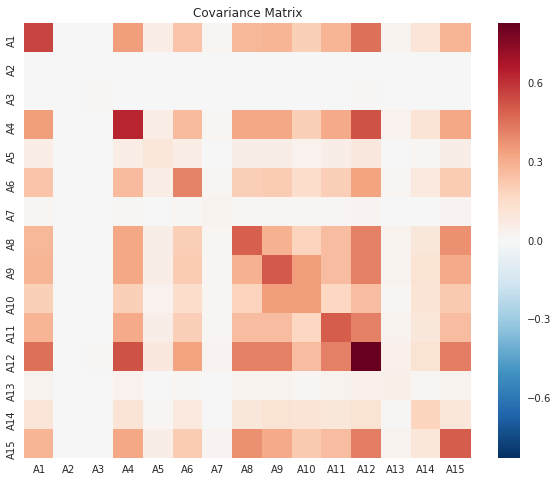

In [8]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


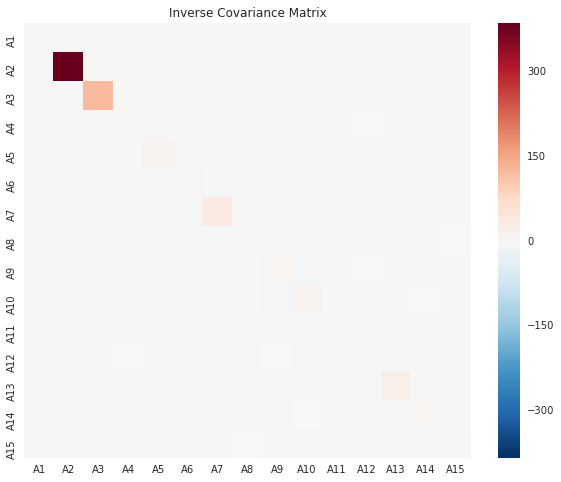

none-zero pairs of abs inv


In [ ]:
pf.session.visualize_inverse_covariance()

In [ ]:
pf.session.visualize_autoregression()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [ ]:
pf.session.timer.get_stat()

In [ ]:
pf.session.timer.to_csv()